In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
ratings = pd.read_csv('recent-grads.csv')

In [25]:
ratings.head()

Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0        270                  1207          37           0.018381  110000   
1        170                   388          85           0.117241   75000   
2        133                   340          16           0.024096   73000   
3        150                   692          40           0.050125   70000   
4       5180                 16697        1672           0.061098   65000   

   P25th   P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
0  95000  125000          1534               364            193  
1  55000   90000           350               257             50  
2  50000  105000           456               176              0  
3  43000   80000           529               102              0  
4  50000   75000         18314              4440            972  

[5 rows x 21 columns]

In [28]:
ratings.shape

(173, 21)

In [29]:
ratings.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [31]:
 ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [44]:
ratings[['Total','Major']]

Total                                      Major
0     2339.0                      PETROLEUM ENGINEERING
1      756.0             MINING AND MINERAL ENGINEERING
2      856.0                  METALLURGICAL ENGINEERING
3     1258.0  NAVAL ARCHITECTURE AND MARINE ENGINEERING
4    32260.0                       CHEMICAL ENGINEERING
..       ...                                        ...
168   8409.0                                    ZOOLOGY
169   2854.0                     EDUCATIONAL PSYCHOLOGY
170   2838.0                        CLINICAL PSYCHOLOGY
171   4626.0                      COUNSELING PSYCHOLOGY
172   1098.0                            LIBRARY SCIENCE

[173 rows x 2 columns]

In [95]:
Major_category_df = ratings.groupby('Major_category').sum().sort_values('Total', ascending=False)
Major_category_df.loc[:,"ShareWomen"] = Major_category_df["Women"] / Major_category_df["Total"]
Major_category_df.loc[:,"Unemployment_rate"] = Major_category_df["Unemployed"] / (Major_category_df["Employed"]+Major_category_df["Unemployed"])
Major_category_df=Major_category_df.drop(columns=['Rank', 'Major_code'])
Major_category_df


Total       Men     Women  \
Major_category                                                       
Business                             1302376.0  667852.0  634524.0   
Humanities & Liberal Arts             713468.0  272846.0  440622.0   
Education                             559129.0  103526.0  455603.0   
Engineering                           537583.0  408307.0  129276.0   
Social Science                        529966.0  256834.0  273132.0   
Psychology & Social Work              481007.0   98115.0  382892.0   
Health                                463230.0   75517.0  387713.0   
Biology & Life Science                453862.0  184919.0  268943.0   
Communications & Journalism           392601.0  131921.0  260680.0   
Arts                                  357130.0  134390.0  222740.0   
Computers & Mathematics               299008.0  208725.0   90283.0   
Industrial Arts & Consumer Services   229792.0  103781.0  126011.0   
Physical Sciences                     185479.0   95390.0   90089.0   
Law & Public Policy                   179107.0   91129.0   87978.0   
Agriculture & Natural Resources        75620.0   40357.0   35263.0   
Interdisciplinary                      12296.0    2817.0    9479.0   

                                     ShareWomen  Sample_size  Employed  \
Major_category                                                           
Business                               0.487205        15505   1088742   
Humanities & Liberal Arts              0.617578         5340    544118   
Education                              0.814844         4742    479839   
Engineering                            0.240476         4926    420372   
Social Science                         0.515376         4581    401493   
Psychology & Social Work               0.796022         3180    380344   
Health                                 0.836977         3914    372147   
Biology & Life Science                 0.592566         2317    302797   
Communications & Journalism            0.663982         4508    330660   
Arts                                   0.623694         3260    288114   
Computers & Mathematics                0.301942         2860    237894   
Industrial Arts & Consumer Services    0.548370         2165    189043   
Physical Sciences                      0.485710         1137    139231   
Law & Public Policy                    0.491204         1935    144790   
Agriculture & Natural Resources        0.466318         1104     66943   
Interdisciplinary                      0.770901          128      9821   

                                     Full_time  Part_time  \
Major_category                                              
Business                                988870     196936   
Humanities & Liberal Arts               416939     214030   
Education                               398059     120593   
Engineering                             381867      85136   
Social Science                          347141     121569   
Psychology & Social Work                289000     137992   
Health                                  294819     114592   
Biology & Life Science                  240377     116736   
Communications & Journalism             273330      89817   
Arts                                    207773     114791   
Computers & Mathematics                 207545      53270   
Industrial Arts & Consumer Services     151383      61122   
Physical Sciences                       112852      43444   
Law & Public Policy                     126940      38213   
Agriculture & Natural Resources          58143      16591   
Interdisciplinary                         8032       3173   

                                     Full_time_year_round  Unemployed  \
Major_category                                                          
Business                                           790425       79877   
Humanities & Liberal Arts                          295561       51101   
Education                                          28803

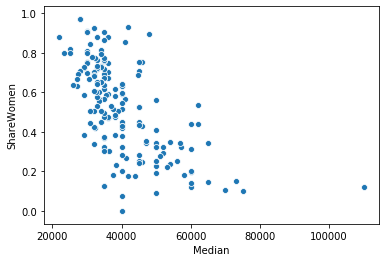

In [47]:
sns.scatterplot(x="Median", y="ShareWomen", data=ratings)
plt.show()

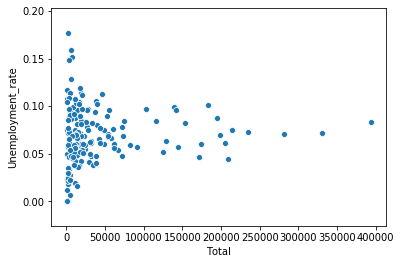

In [51]:
sns.scatterplot(x="Total", y="Unemployment_rate", data=ratings)
plt.show()

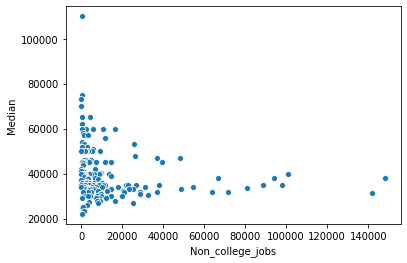

In [79]:
sns.scatterplot(x="Non_college_jobs", y="Median", data=ratings)
plt.show()

In [66]:
pccs = np.corrcoef(ratings["Non_college_jobs"], ratings["Median"])
pccs

array([[ 1.        , -0.17436305],
       [-0.17436305,  1.        ]])

In [68]:
pccs = np.corrcoef(ratings["Median"],ratings["Unemployment_rate"])
pccs

array([[ 1.        , -0.10883329],
       [-0.10883329,  1.        ]])

In [81]:
df=ratings.dropna()
pccs = np.corrcoef(df["Rank"],df["ShareWomen"])
pccs

array([[1.        , 0.64378142],
       [0.64378142, 1.        ]])

In [94]:
df=ratings.drop(columns=['Major_code', 'Major','Major_category'])
np.corrcoef(df)


array([[1.        , 0.99585382, 0.98119643, ..., 0.98450866, 0.98635914,
        0.99601832],
       [0.99585382, 1.        , 0.9936229 , ..., 0.98707162, 0.98311852,
        0.98523159],
       [0.98119643, 0.9936229 , 1.        , ..., 0.98918141, 0.96988103,
        0.96140405],
       ...,
       [0.98450866, 0.98707162, 0.98918141, ..., 1.        , 0.97975073,
        0.9709346 ],
       [0.98635914, 0.98311852, 0.96988103, ..., 0.97975073, 1.        ,
        0.98529312],
       [0.99601832, 0.98523159, 0.96140405, ..., 0.9709346 , 0.98529312,
        1.        ]])